In [23]:
# Analyze sequence length values
lens = []
for x in x_train:
    lens.append(len(x))

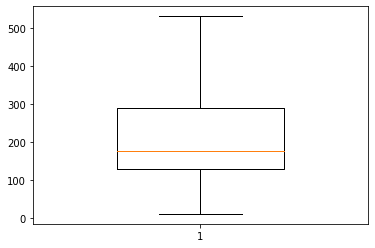

In [85]:
import matplotlib.pyplot as plt

plt.boxplot(lens, widths=0.5, manage_ticks=True, showfliers=False)
plt.show()

In [19]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 20000
maxlen = 64

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
word_index = imdb.get_word_index()
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [20]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Dropout

model = Sequential()
model.add(Embedding(max_features, 32, input_length=maxlen))
model.add(Flatten())
model.add(Dense(16, activation='relu',kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
history = model.fit(x_train, y_train, epochs=5,
batch_size=64, validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 64, 32)            640000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                32784     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 672,801
Trainable params: 672,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
313/313 [==============================] - 2s 7ms/step - loss: 0.6511 - acc: 0.6896 - val_loss: 0.5258 -

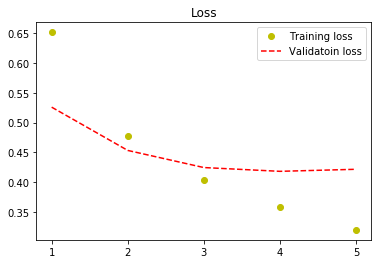

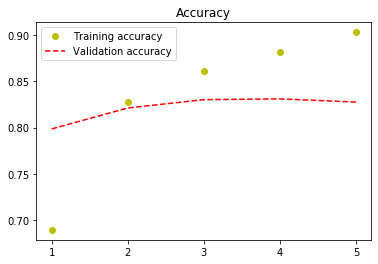

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def plot_history(hist):
    epochs = np.array(hist.epoch) + 1

    plt.plot(epochs, hist.history['loss'], 'yo', label='Training loss')
    plt.plot(epochs, hist.history['val_loss'], 'r--', label='Validatoin loss')
    plt.xticks(epochs)
    plt.xlabel='Epoch'
    plt.title('Loss')
    plt.legend()
    plt.show()
    plt.plot(epochs, hist.history['acc'], 'yo', label='Training accuracy')
    plt.plot(epochs, hist.history['val_acc'], 'r--', label='Validation accuracy')
    plt.xticks(epochs)
    plt.xlabel='Epoch'
    plt.title('Accuracy')
    plt.legend()
    plt.show()

plot_history(history)